In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Website_VIP_User_data_10000.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
Unnamed: 0                        10001 non-null int64
IsVIP_500                         10001 non-null int64
payment_7_day                     10001 non-null float64
dau_days                          10001 non-null int64
days_between_install_first_pay    10001 non-null int64
total_txns_7_day                  10001 non-null int64
total_page_views                  10001 non-null int64
total_product_liked               10001 non-null int64
product_like_rate                 10001 non-null float64
total_free_coupon_got             10001 non-null int64
total_bonus_xp_points             10001 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


The first column of the data frame is meaningless, drop it

In [4]:
df1=df1.drop(df1.columns[0], axis=1)

In [5]:
df1.columns

Index(['IsVIP_500', 'payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_page_views', 'total_product_liked', 'product_like_rate',
       'total_free_coupon_got', 'total_bonus_xp_points'],
      dtype='object')

# deal with missing data in the dataset

In [6]:
# get the number of missing data points per column
missing_values_count = df1.isnull().sum()
print(missing_values_count)

IsVIP_500                         0
payment_7_day                     0
dau_days                          0
days_between_install_first_pay    0
total_txns_7_day                  0
total_page_views                  0
total_product_liked               0
product_like_rate                 0
total_free_coupon_got             0
total_bonus_xp_points             0
dtype: int64


###### From above, we can learn that there is no missing value in this dataset.

In [7]:
df1.head()

,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,product_like_rate,total_free_coupon_got,total_bonus_xp_points
0,0,15.98,6,8,3,266,95,0.357143,9,1275000
1,0,8.48,7,372,3,484,118,0.243802,15,1346100
2,0,3.49,7,439,2,504,151,0.299603,10,863400
3,0,3.99,7,570,2,513,165,0.321637,13,2050200
4,0,38.00,3,1741,4,31,6,0.193548,7,3133500


In [8]:
df1.sample(10)  ## we can see, there are some negative value in column "total_product_liked" and "product_like_rate"

,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,product_like_rate,total_free_coupon_got,total_bonus_xp_points
7242,0,5.99,7,1593,3,90,3,0.033333,16,2610600
7798,0,100.97,2,71,5,1855,548,0.295418,5,413400
9344,0,26.88,6,1683,5,823,187,0.227217,8,790500
189,0,8.49,7,1079,2,1150,162,0.140870,13,1119300
5101,0,10.10,7,2499,5,205,46,0.224390,15,1145400
4073,0,40.98,7,7,4,574,120,0.209059,7,801000
8843,0,83.51,1,74,2,-6,-11,1.833333,0,0
5276,0,20.97,7,920,4,129,10,0.077519,7,1270500
9407,0,17.99,3,98,2,96,7,0.072917,4,114000
3383,0,18.99,6,91,2,95,24,0.252632,8,783000


# Describe the data with statistical information about each feature.

In [9]:
df1.describe()

,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,product_like_rate,total_free_coupon_got,total_bonus_xp_points
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000,1.000100e+04
mean,0.015498,21.732978,4.725127,645.522248,3.254975,375.029397,94.568943,-inf,6.819018,7.457103e+05
std,0.123530,28.614734,2.193795,867.677542,2.228897,534.204200,156.700696,NaN,7.429485,9.371288e+05
min,0.000000,1.510000,1.000000,1.000000,2.000000,-9.000000,-19.000000,-inf,0.000000,0.000000e+00
25%,0.000000,7.150000,3.000000,17.000000,2.000000,56.000000,2.000000,1.107383e-01,2.000000,1.260000e+05
50%,0.000000,11.990000,5.000000,97.000000,3.000000,187.000000,39.000000,2.159624e-01,6.000000,5.310000e+05
75%,0.000000,22.860000,7.000000,1226.000000,3.000000,478.000000,122.000000,2.854220e-01,11.000000,1.122000e+06
max,1.000000,208.930000,7.000000,3242.000000,83.000000,7620.000000,2151.000000,1.900000e+01,331.000000,3.901410e+07


From the dataset description, we learned that product_like_rate = total_product_liked divided by total_page_views. Suppose there is no "dislike" function on the website, we have to clean the data to make sure that total_product_liked>=0 and total_page_views>0.

In [10]:
##count how many rows total_product_liked<0
len(df1.loc[df1['total_product_liked']<0,:])

2246

In [11]:
##drop rows when total_product_liked<0
## drop rows by index    when condition is meet
df1 = df1.drop(df1.loc[df1['total_product_liked']<0].index, axis=0)

In [12]:
##count how many rows total_page_views<=0
len(df1.loc[df1['total_page_views']<=0,:])

0

In [13]:
df1.describe()  ## from below, we can learn that mean and standard deviation in each column have a huge difference, we'd 
                ## better to scale every feature to 0~1

,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,product_like_rate,total_free_coupon_got,total_bonus_xp_points
count,7755.000000,7755.000000,7755.000000,7755.000000,7755.000000,7755.000000,7755.000000,7755.000000,7755.000000,7.755000e+03
mean,0.018698,22.044017,5.284462,678.905480,3.417666,478.803611,124.774984,0.222781,8.009413,8.787118e+05
std,0.135464,28.513955,1.928382,885.512417,2.474690,565.626824,166.124642,0.089729,7.846610,9.898261e+05
min,0.000000,1.510000,1.000000,1.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,7.985000,4.000000,17.000000,2.000000,136.000000,24.000000,0.168539,3.000000,2.640000e+05
50%,0.000000,12.000000,6.000000,114.000000,3.000000,282.000000,67.000000,0.228269,7.000000,6.978000e+05
75%,0.000000,22.980000,7.000000,1318.000000,4.000000,600.000000,157.000000,0.282509,12.000000,1.270200e+06
max,1.000000,208.930000,7.000000,3242.000000,83.000000,7620.000000,2151.000000,0.661622,331.000000,3.901410e+07


In [14]:
df1.shape

(7755, 10)

# deal with outlier in the data set

In [15]:
## use three-sigma method to detect outliers 
def outlier(x,k):
    ## x is a column of a dataframe, k is how many times of standard deviations, usually k=3
    loc   = []
    temp  = []
    mean  = np.mean(x)
    std   = np.std(x)
    lower = mean-k*std
    upper = mean+k*std
    for id in x.index:
        if x[id]<lower or x[id]>upper:
            loc.append(id)
            temp.append(x[id])          
           
    return pd.Series(temp,loc)
    ## return the index of rows, and the outlier value

In [16]:
## for instance, detect outliers in column "payment_7_day"
outlier(df1['payment_7_day'],3)

28      112.96
119     153.97
204     188.87
310     150.97
362     201.96
387     155.97
399     168.94
417     121.89
440     124.93
445     154.97
469     122.98
511     191.94
522     156.97
634     151.97
686     155.97
705     151.97
733     109.98
748     146.86
807     159.98
816     157.97
878     152.93
881     156.98
936     136.00
947     158.97
959     131.00
987     138.93
1044    111.40
1136    125.90
1152    119.95
1212    158.97
         ...  
8066    128.98
8138    118.93
8413    187.90
8423    112.96
8668    119.88
8675    197.91
8729    153.37
8752    130.00
8766    137.88
8774    136.87
8775    178.93
8863    108.99
8894    117.01
8900    118.94
8933    195.95
8984    154.99
9055    131.00
9341    108.98
9348    151.98
9374    107.95
9467    181.37
9482    107.87
9485    155.98
9518    166.95
9716    113.96
9823    135.92
9830    171.00
9956    113.95
9961    201.00
9979    191.19
Length: 216, dtype: float64

In [17]:
## check how many outlier in each column of the data frame
for i in range(1,10):
    print(df1.columns[i],": ", len(outlier(df1[df1.columns[i]],3)))

payment_7_day :  216
dau_days :  0
days_between_install_first_pay :  0
total_txns_7_day :  128
total_page_views :  167
total_product_liked :  175
product_like_rate :  12
total_free_coupon_got :  33
total_bonus_xp_points :  44


# Visualization of each feature and the target variable (class distribution).

### Visualization of each feature

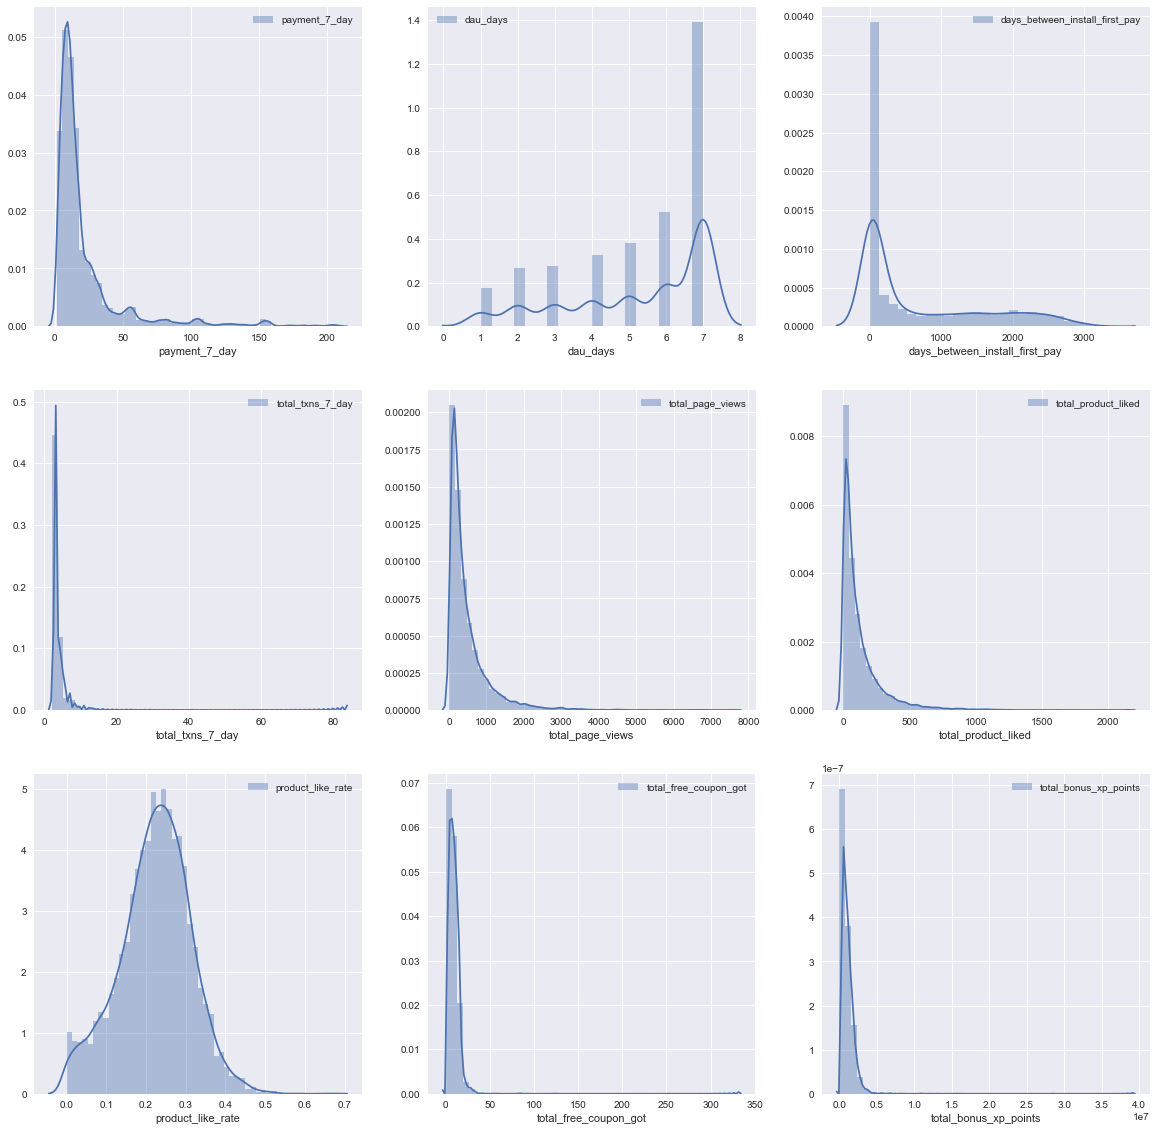

In [18]:
## use distplot to check the distribution of each feature
plt.figure(figsize=(20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.distplot(df1[df1.columns[i]], label=df1.columns[i])
    plt.legend()
plt.show()


###### From the distribution above, we can see that most of the features are skew.

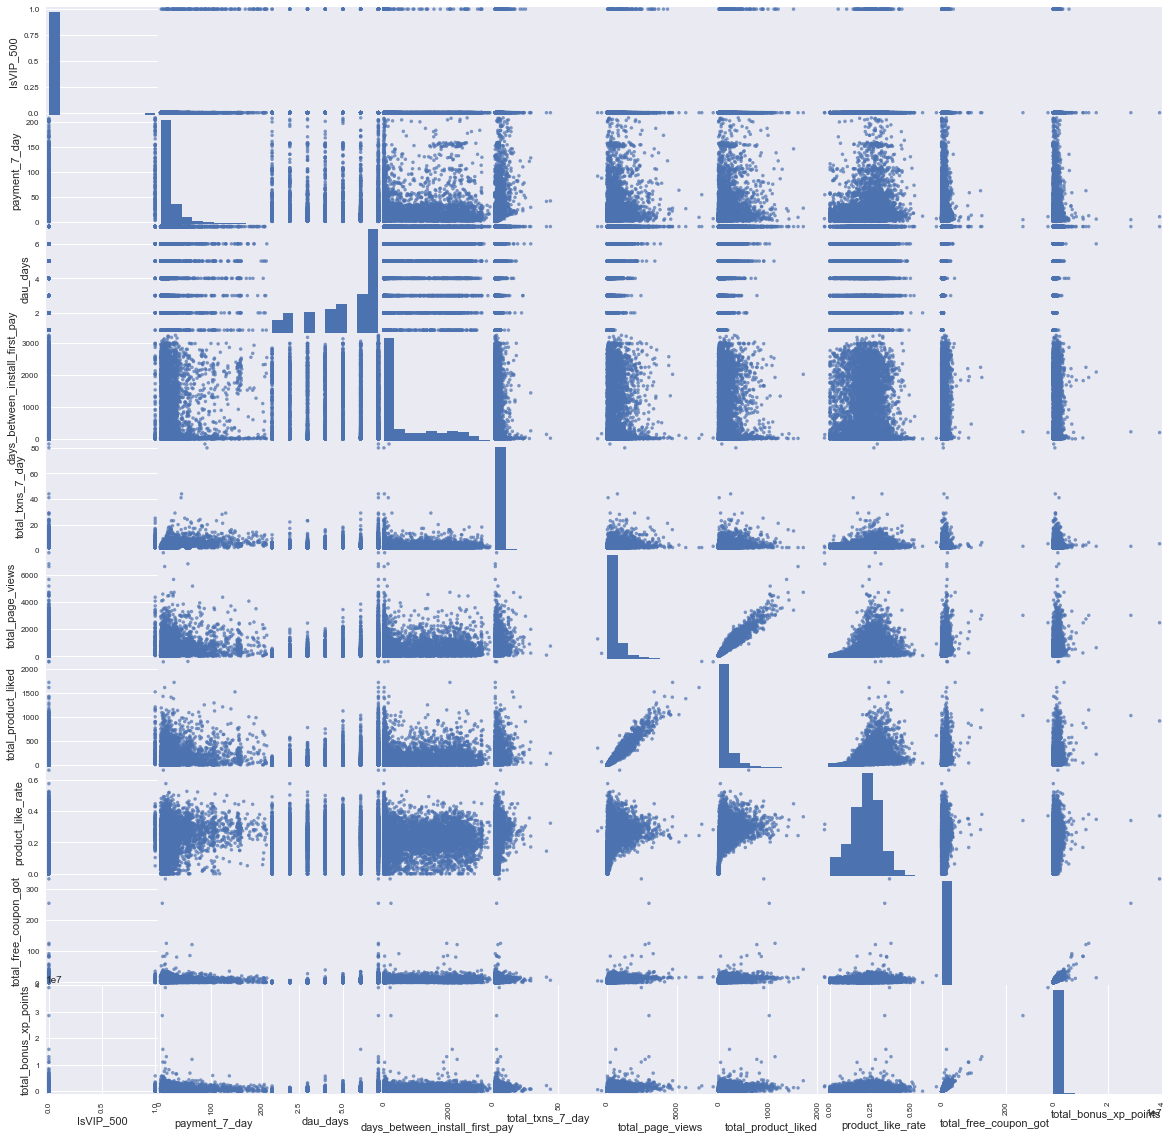

In [19]:
## use scatter matrix to detect correlation between variables
pd.plotting.scatter_matrix(df1, alpha=0.7, figsize=(20,20), diagonal='hist')
plt.show()

###### From the scatter matrix above, we can see that variable "total_product_liked" has a high corelation with variable "total_page_views", variable "total_free_coupon_got" has a high corelation with variable "total_bonus_xp_points".

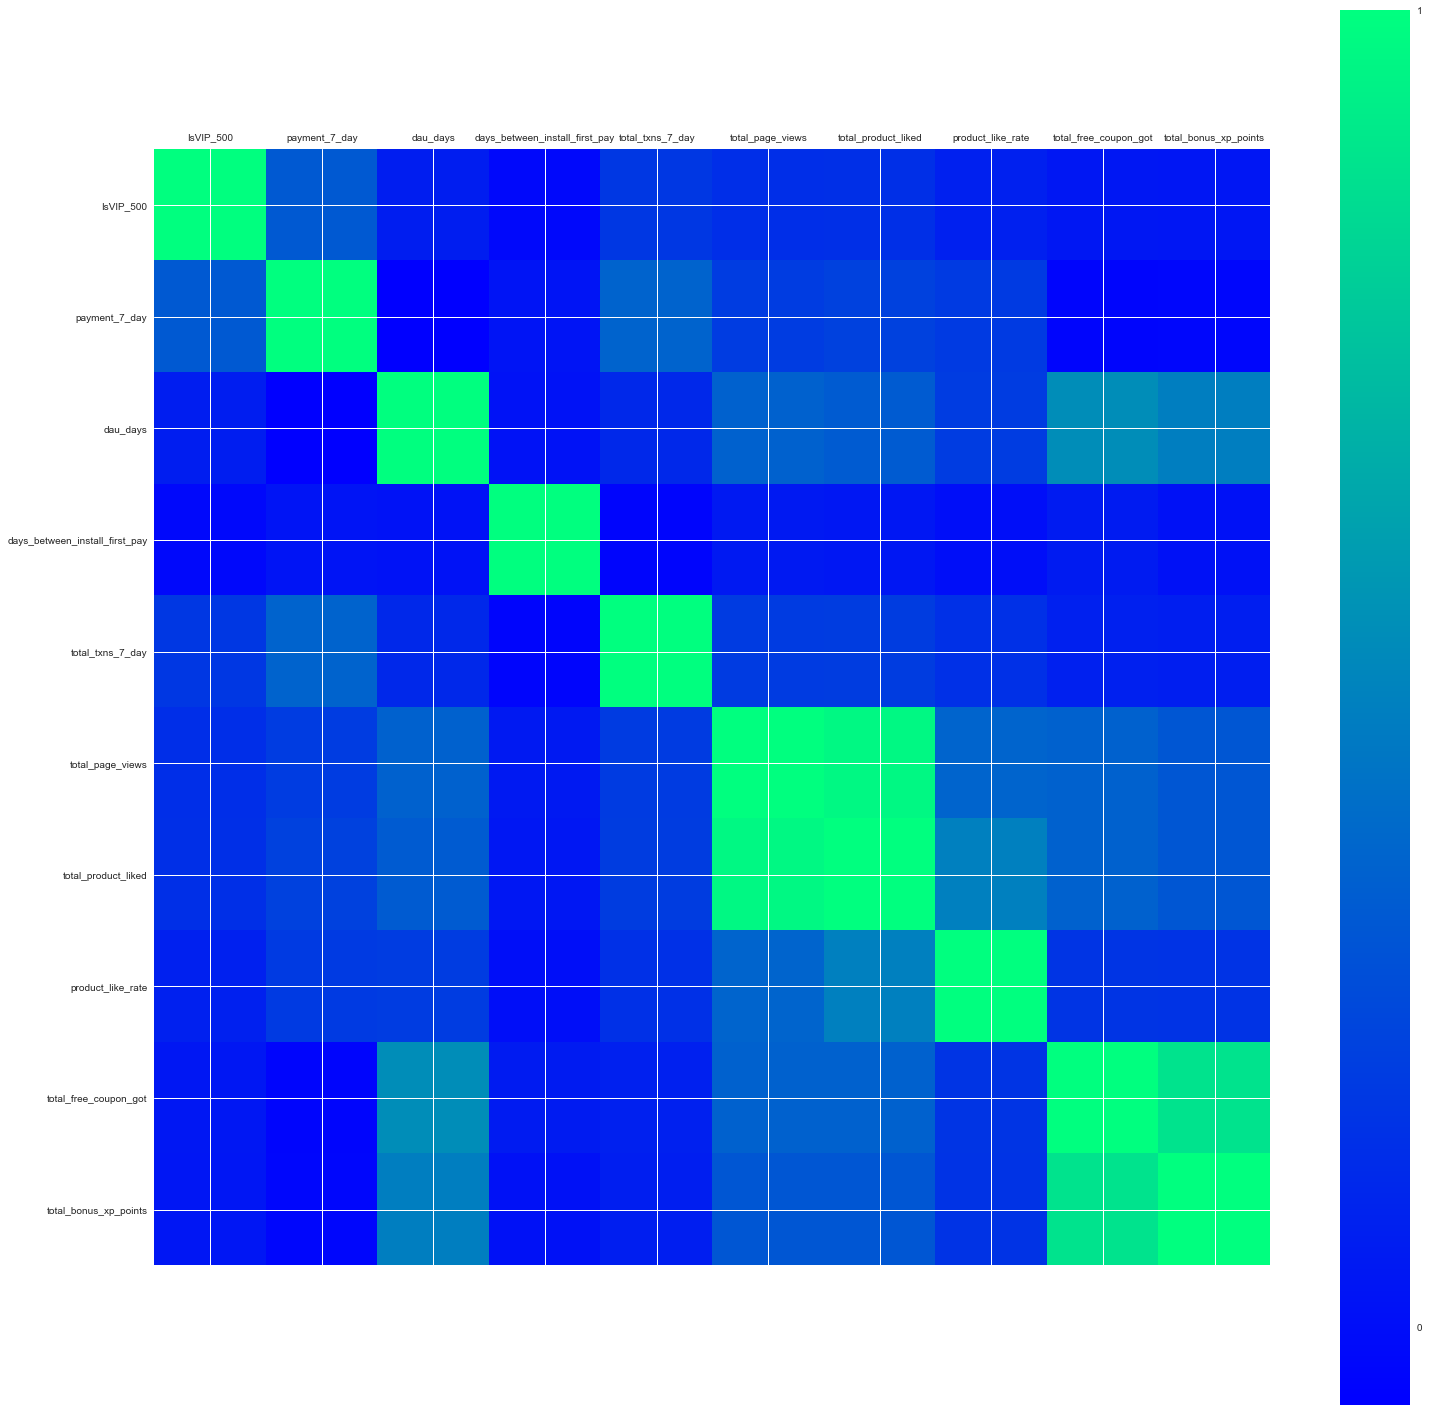

In [20]:
## use np.corrcoef to plot correlation coefficients between variables
## green means has a high correlation, blue means has a low correlation.
cov = np.corrcoef(df1.T)
plt.figure(figsize=(25,25))
img = plt.matshow(cov,cmap=plt.cm.winter, fignum=1)
plt.colorbar(img, ticks=[-1,0,1])
plt.xticks(np.arange(len(df1.keys())), df1.keys())
plt.yticks(np.arange(len(df1.keys())), df1.keys())
plt.show()

###### From the np.corrcoef plot above, we can also learn that variable "total_product_liked" has a high corelation with variable "total_page_views", variable "total_free_coupon_got" has a high corelation with variable "total_bonus_xp_points".

### Visualization of the target variable

In [21]:
## count how many VIP and not-VIP in the dataset
whetherVIP=df1.groupby(['IsVIP_500'])['IsVIP_500'].count()
print(whetherVIP)

IsVIP_500
0    7610
1     145
Name: IsVIP_500, dtype: int64


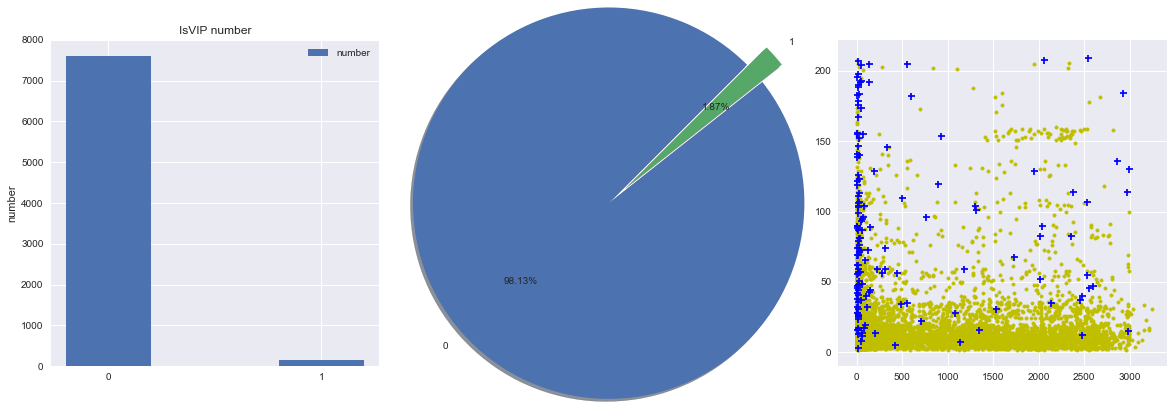

In [22]:
## use bar plot to visualize how many VIP and not-VIP in the dataset
%matplotlib inline 

plt.figure(figsize=(20,6))
plt.subplot(131)
plt.bar(whetherVIP.index, whetherVIP.asobject, width=0.4, label="number")
plt.xticks(whetherVIP.index)
plt.ylabel("number")
plt.title('IsVIP number')
plt.legend()

## use pie plot to visualize how many VIP and not-VIP in the dataset
plt.subplot(132)
plt.axis("equal")
plt.pie(whetherVIP.asobject, labels=whetherVIP.index, radius=1.5,autopct='%0.2f%%',\
       shadow=True,explode=[0,0.2],startangle=45)


## use scatter plot to visualize how many VIP and not-VIP in the dataset
plt.subplot(133)
nVIP=df1.loc[df1['IsVIP_500']==0][['payment_7_day','days_between_install_first_pay']]
yVIP=df1.loc[df1['IsVIP_500']==1][['payment_7_day','days_between_install_first_pay']]
plt.scatter(nVIP['days_between_install_first_pay'],nVIP['payment_7_day'], color='y', marker='.')
plt.scatter(yVIP['days_between_install_first_pay'],yVIP['payment_7_day'], color='b', marker='+')
plt.show()

###### From the plot above, we can learn that the target variable is extremely imbalance. Not-VIP class has a proportion of 98.13%, while IS-VIP class only has a proportion of 1.87%.

## Feature scaling  
By scaling our variables, we can help compare different variables on equal footing.   
Z-score standardization or Min-Max scaling? 
http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling
https://www.researchgate.net/post/If_I_used_data_normalization_x-meanx_stdx_for_training_data_would_I_use_train_Mean_and_Standard_Deviation_to_normalize_test_data

In [23]:
## step1 : subset the data to X and y
X=df1[['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_page_views', 'total_product_liked', 'product_like_rate',
       'total_free_coupon_got', 'total_bonus_xp_points']]

In [24]:
y=df1['IsVIP_500']

In [25]:
## Min-Max scaling
## The cost of having this bounded range - in contrast to standardization 
## is that we will end up with smaller standard deviations, which can suppress the effect of outliers.
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
X=minmax_scaler.fit_transform(X)

In [26]:
## print X
X

array([[ 0.06976184,  0.83333333,  0.00215983, ...,  0.53979925,
         0.02719033,  0.03268049],
       [ 0.03360332,  1.        ,  0.11447084, ...,  0.36849106,
         0.04531722,  0.03450291],
       [ 0.00954585,  1.        ,  0.13514347, ...,  0.4528316 ,
         0.03021148,  0.02213046],
       ..., 
       [ 0.04088323,  1.        ,  0.27614934, ...,  0.33587509,
         0.05135952,  0.02639046],
       [ 0.07226883,  1.        ,  0.06325208, ...,  0.3635249 ,
         0.02416918,  0.01015018],
       [ 0.05539485,  1.        ,  0.26411601, ...,  0.36189358,
         0.03021148,  0.01714765]])

# classifier and metrics used to evaluate the results

## Model0-Dummy Classifiers  
DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [27]:
#build test and training sets
from sklearn.cross_validation import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
## build the dummy classifier model

from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train0, y_train0)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test0)
## we can see every outcome of dummy prediction is 0
np.unique(y_dummy_predictions, return_counts=True) 

(array([0], dtype=int64), array([2327], dtype=int64))

In [29]:
## the actual value counts of y_test
y_test0.value_counts()

0    2281
1      46
Name: IsVIP_500, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score
print("Dummy Classifier accuracy is %2.6f" % accuracy_score(y_test0,y_dummy_predictions))

Dummy Classifier accuracy is 0.980232


Predictive accuracy is the performance measure generally associated with machine learning
algorithms and is defined as Accuracy = (TP + TN)/(TP + FP + TN + FN) . In the
context of balanced datasets and equal error costs, it is reasonable to use error rate as a
performance metric. Error rate is 1 − Accuracy. In the presence of imbalanced datasets
with unequal error costs, it is more appropriate to use the ROC curve or other similar
techniques (Ling & Li, 1998; Drummond & Holte, 2000; Provost & Fawcett, 2001; Bradley,
1997; Turney, 1996).

Accuracy = TP + TN / (TP + TN + FP + FN)  
Precision = TP / (TP + FP)  
Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate  
F1 = 2 * Precision * Recall / (Precision + Recall) 

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test0, dummy_majority.predict(X_test0) ))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2281
          1       0.00      0.00      0.00        46

avg / total       0.96      0.98      0.97      2327



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


From the classification report above, we can learn that even though the overall accuracy is 98.02%, the precision of class 0 is 98.00% and the recall of class 0 is 100.00%. But for class 1, the precision and recall both are 0.00%, which means the DummyClassifier model can not find out any true positive(predict the class as 1 while the actual class is also 1). Hence, we believe, for this kind of extremely imbalance dataset, the overall accuracy is not a proper evaluation metrics. In this case, the precision ,recall and f1-socre will be better for the model's evaluation.

###### Hence, for this kind of extremely imbalance dataset and classification problem, we can use metrics like recall, pression, f1-socre, roc_auc score and roc curve to evaluate the model's profermance.

## Synthetic Minority Over-sampling Technique -- SMOTE  
By oversampling only on the training data, none of the information in the test data is being used to create synthetic observations. So these results should be generalizable.   
https://beckernick.github.io/oversampling-modeling/

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
os= SMOTE(random_state=0)
X_os, y_os= os.fit_sample(X, y)

In [34]:
## the outcome of SMOTE is a array, not a data frame, check X_os have how many records
len(X_os)

15220

In [35]:
## check y_os have how many records of 0 and how many records of 1
## we can see that the number of o and the number of 1 are 7610:7610, means not_VIP: VIP is 1:1 now.
np.unique(y_os, return_counts=True)

(array([0, 1], dtype=int64), array([7610, 7610], dtype=int64))

## Model1-Logistic Regression

In [36]:
##step1: split the (X_os~y_os )data into training data and test data, usually 0.7:0.3

#build test and training sets
from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

In [37]:
print(len(X_train1),len(X_test1)) 

10654 4566


In [38]:
## check y_os have how many records of 0 and how many records of 1 in y_train1
np.unique(y_train1, return_counts=True)

(array([0, 1], dtype=int64), array([5351, 5303], dtype=int64))

In [39]:
## the proportion of 0 and 1 in y_train1
5351/5303

1.009051480294173

In [40]:
## check y_os have how many records of 0 and how many records of 1 in y_test1
np.unique(y_test1, return_counts=True)

(array([0, 1], dtype=int64), array([2259, 2307], dtype=int64))

In [41]:
## the proportion of 0 and 1 in y_test1
2259/2307

0.9791937581274383

In [42]:
## step2: use training to fit the model
from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state=0)
## Fit the model according to the given training data
logclassifier.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
## step3: use the trainned model to predict the outcome of test data
logclassifier.predict(X_test1)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [44]:
## stpe4: use the predict outcome of test data and the original y_test to calculate the model's performance
## like : accuracy score; classify_report; confusion_matrix; 
from sklearn.metrics import accuracy_score
print("Logistic accuracy is %2.6f" % accuracy_score(y_test1,logclassifier.predict(X_test1)))

Logistic accuracy is 0.819974


###### Define a function to plot the confusion matrix
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [45]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2004  255]
 [ 567 1740]]


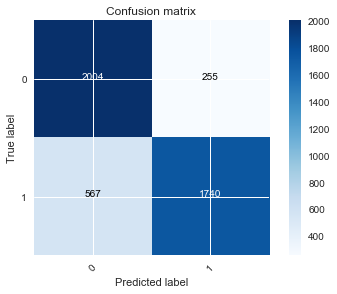

In [46]:
## plot the confusion_matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test1, logclassifier.predict(X_test1))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

###### From the confusion matrix above, we can learn that the True Positive=1740, Flase Positve=255, True Negative=2004, Flase Negative=567.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, logclassifier.predict(X_test1) ))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83      2259
          1       0.87      0.75      0.81      2307

avg / total       0.83      0.82      0.82      4566



In [48]:
from sklearn.metrics import roc_auc_score
logit_roc_auc=roc_auc_score(y_test1, logclassifier.predict(X_test1))
print(logit_roc_auc)

0.820672230886


In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, logclassifier.predict_proba(X_test1)[:,1])

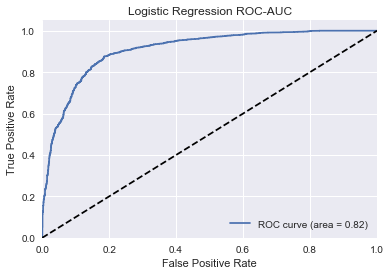

In [50]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC')
plt.legend(loc="lower right")
plt.show()

two class Precision-Recall curve  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [51]:
y_score = logclassifier.decision_function(X_test1)

In [52]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test1, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


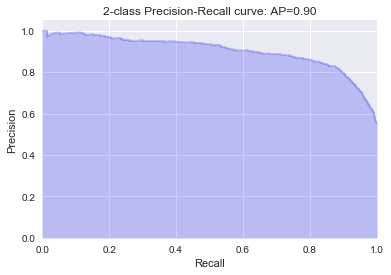

In [53]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test1, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

## Model2-Random Forests

In [54]:
##step1: split the (X_os~y_os )data into training data and test data, usually 0.7:0.3

#build test and training sets
from sklearn.cross_validation import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

In [55]:
## step2: use training to fit the model
from sklearn.ensemble import RandomForestClassifier
rfclassifier= RandomForestClassifier(random_state=0)
## Fit the model according to the given training data
rfclassifier.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
## step3: use the trainned model to predict the outcome of test data
rfclassifier.predict(X_test2)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [57]:
## stpe4: use the predict outcome of test data and the original y_test to calculate the model's performance
## like : accuracy score; classify_report; confusion_matrix; 
from sklearn.metrics import accuracy_score
print("Random Forests accuracy is %2.6f" % accuracy_score(y_test2,rfclassifier.predict(X_test2)))

Random Forests accuracy is 0.978975


Confusion matrix, without normalization
[[2198   61]
 [  35 2272]]


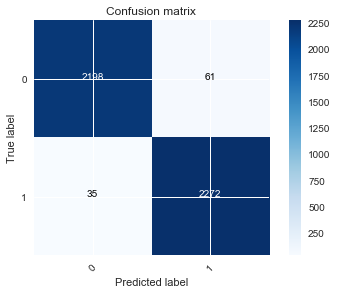

In [58]:
## plot the confusion_matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, rfclassifier.predict(X_test2))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

###### From the confusion matrix above, we can learn that the True Positive=2272, Flase Positve=61, True Negative=2198, Flase Negative=35.

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, rfclassifier.predict(X_test2) ))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      2259
          1       0.97      0.98      0.98      2307

avg / total       0.98      0.98      0.98      4566



In [60]:
from sklearn.metrics import roc_auc_score
rf_roc_auc=roc_auc_score(y_test2, rfclassifier.predict(X_test2))
print(rf_roc_auc)

0.978912841626


In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, rfclassifier.predict_proba(X_test2)[:,1])

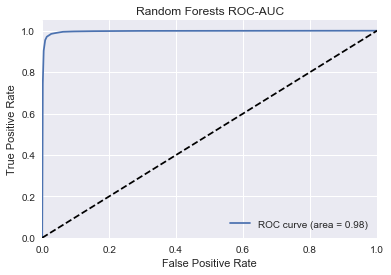

In [62]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests ROC-AUC')
plt.legend(loc="lower right")
plt.show()

###### Based on above modeling, it seems that Random Forests model is perform better than Logistic Regression model in this dataset. Let us use K-Fold Cross Validation to double check.

# K-Fold Cross Validation

In [63]:
## use K-Fold cross validation method to divide the dataset into 10 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_os):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_os[train_index], X_os[test_index]
    y_train, y_test = y_os[train_index], y_os[test_index]

TRAIN: [    0     1     2 ..., 15216 15217 15218] TEST: [   12    18    31 ..., 15173 15209 15219]
TRAIN: [    0     1     2 ..., 15217 15218 15219] TEST: [    9    14    16 ..., 15189 15199 15206]
TRAIN: [    0     1     2 ..., 15217 15218 15219] TEST: [    8    32    39 ..., 15202 15203 15215]
TRAIN: [    0     1     2 ..., 15217 15218 15219] TEST: [   15    23    36 ..., 15190 15208 15214]
TRAIN: [    0     1     2 ..., 15217 15218 15219] TEST: [    5    20    22 ..., 15169 15176 15191]
TRAIN: [    0     1     2 ..., 15216 15217 15219] TEST: [    6     7    24 ..., 15204 15213 15218]
TRAIN: [    0     2     3 ..., 15217 15218 15219] TEST: [    1     4    11 ..., 15211 15212 15216]
TRAIN: [    0     1     4 ..., 15217 15218 15219] TEST: [    2     3    10 ..., 15195 15207 15210]
TRAIN: [    0     1     2 ..., 15217 15218 15219] TEST: [   13    26    27 ..., 15174 15183 15194]
TRAIN: [    1     2     3 ..., 15216 15218 15219] TEST: [    0    21    25 ..., 15184 15197 15217]


In [64]:
##check if the proportion of  not_VIP and is_VIP is roughly 1:1 in y_train dataset
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([6855, 6843], dtype=int64))

In [65]:
##check if the proportion of  not_VIP and is_VIP is roughly 1:1 in y_test dataset
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([755, 767], dtype=int64))

In [66]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

### 10-Fold cross validation for Logistic Regression

In [67]:
## Use each fold data to train and test the logistic regression model, and print out the performance metrics
## here, we use recall_score, precision_score and classification_report as our model's  performance metrics
i=0
recall_all = np.array([])
precision_all = np.array([])
roc_auc_all = np.array([])
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_os):
    ##print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_os[train_index], X_os[test_index]
    y_train, y_test = y_os[train_index], y_os[test_index]
    logclassifier.fit(X_train, y_train)
    print("-----Fold-", i,"------")
    rec = recall_score(y_test, logclassifier.predict(X_test), average='micro')
    prec = precision_score(y_test, logclassifier.predict(X_test), average='macro')
    roc_auc=roc_auc_score(y_test, logclassifier.predict(X_test))
    ##print(accuracy_score(y_test,model11.predict(X_test)))
    print("recall_score:", recall_score(y_test, logclassifier.predict(X_test), average='micro'))
    ##print("precision_score:", precision_score(y_test, logclassifier.predict(X_test), average='macro'))
    print("roc_auc score:", roc_auc)
    print(classification_report(y_test, logclassifier.predict(X_test) ))
    i=i+1
    recall_all = np.append(recall_all, rec)
    precision_all = np.append(precision_all, prec) 
    roc_auc_all = np.append(roc_auc_all, roc_auc)
    
print("average recall_score of Logistic Regression Model:", np.mean(recall_all))
print("average precision_score of Logistic Regression Model::", np.mean(precision_all))
print("average roc_auc score of Logistic Regression Model::", np.mean(roc_auc_all))

-----Fold- 0 ------
recall_score: 0.812746386334
roc_auc score: 0.814471767274
             precision    recall  f1-score   support

          0       0.77      0.87      0.82       739
          1       0.86      0.75      0.81       783

avg / total       0.82      0.81      0.81      1522

-----Fold- 1 ------
recall_score: 0.814717477004
roc_auc score: 0.816374663073
             precision    recall  f1-score   support

          0       0.77      0.88      0.82       742
          1       0.87      0.75      0.81       780

avg / total       0.82      0.81      0.81      1522

-----Fold- 2 ------
recall_score: 0.835742444152
roc_auc score: 0.834250697957
             precision    recall  f1-score   support

          0       0.80      0.90      0.85       778
          1       0.88      0.77      0.82       744

avg / total       0.84      0.84      0.83      1522

-----Fold- 3 ------
recall_score: 0.823915900131
roc_auc score: 0.823617883933
             precision    recall  f1-sc

### 10-Fold cross validation for Random Forests

In [68]:
## Use each fold data to train and test the random forests model, and print out the performance metrics
## here, we use recall_score, precision_score and classification_report as our model's  performance metrics
i=0
recall_all = np.array([])
precision_all = np.array([])
roc_auc_all = np.array([])
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_os):
    ##print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_os[train_index], X_os[test_index]
    y_train, y_test = y_os[train_index], y_os[test_index]
    rfclassifier.fit(X_train, y_train)
    print("-----Fold-", i,"------")
    rec = recall_score(y_test, rfclassifier.predict(X_test), average='micro')
    prec = precision_score(y_test, rfclassifier.predict(X_test), average='macro')
    roc_auc=roc_auc_score(y_test, rfclassifier.predict(X_test))
    ##print(accuracy_score(y_test,model22.predict(X_test)))
    print("recall_score:", recall_score(y_test, rfclassifier.predict(X_test), average='micro'))
    #print("precision_score:", precision_score(y_test, rfclassifier.predict(X_test), average='macro'))
    print("roc_auc score:", roc_auc)
    print(classification_report(y_test, rfclassifier.predict(X_test) ))
    i=i+1
    recall_all = np.append(recall_all, rec)
    precision_all = np.append(precision_all, prec)    
    roc_auc_all = np.append(roc_auc_all, roc_auc)
    
print("average recall_score of Random Forests Model:", np.mean(recall_all))
print("average precision_score of Random Forests Model:", np.mean(precision_all))
print("average roc_auc score of Random Forests Model::", np.mean(roc_auc_all))

-----Fold- 0 ------
recall_score: 0.983574244415
roc_auc score: 0.983465454162
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       739
          1       0.98      0.99      0.98       783

avg / total       0.98      0.98      0.98      1522

-----Fold- 1 ------
recall_score: 0.981603153745
roc_auc score: 0.981493192342
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       742
          1       0.98      0.99      0.98       780

avg / total       0.98      0.98      0.98      1522

-----Fold- 2 ------
recall_score: 0.985545335085
roc_auc score: 0.985626226608
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       778
          1       0.98      0.99      0.99       744

avg / total       0.99      0.99      0.99      1522

-----Fold- 3 ------
recall_score: 0.981603153745
roc_auc score: 0.981608048184
             precision    recall  f1-sc

###### Base on the 10-Fold cross validation above, we can see that the average recall_score, average precision_score and average roc_auc score in Random Forests model is much higher than that in Logistic Regression model. Hence, we can make sure that Random Forests model is perform better than Logistic Regression model in this dataset. 

#  improve the results

### Feature selection-Logistic Regression

Avoid collinearity in Logistics Regression model: From previous data exploration, we know that variable "total_product_liked" has a high corelation with variable "total_page_views", variable "total_free_coupon_got" has a high corelation with variable"total_bonus_xp_points". Besides, we kown "product_like_rate"="total_product_liked" / "total_page_views", so we can say that these three features also have correlation. Now, in order to avoid collinearity between features, let's try to eliminate some features.

when features= ['payment_7_day', 'dau_days', 'days_between_install_first_pay', 'total_txns_7_day', 'total_page_views', 'total_product_liked', 'product_like_rate', 'total_free_coupon_got', 'total_bonus_xp_points']
roc_auc score= 0.820672230886
recall score: 0.819973718791
             precision    recall  f1-score   support

          0       0.78      0.89      0.83      2259
          1       0.87      0.75      0.81      2307

avg / total       0.83      0.82      0.82      4566

when features= ['payment_7_day', 'dau_days', 'days_between_install_first_pay', 'total_txns_7_day', 'total_page_views', 'total_bonus_xp_points']
roc_auc score= 0.830895461644
recall score: 0.830267192291
             precision    recall  f1-score   support

          0       0.79      0.89      0.84      2259
          1       0.88      0.77      0.82      2307

avg / total       0.84      0.83      0.83      4566

when features= ['payment_7_day', 'dau_days', 'days_between_install_first_pay', 'total_txns_7_da

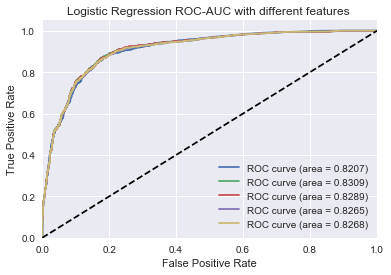

In [69]:
column=[['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_page_views', 'total_product_liked', 'product_like_rate',
       'total_free_coupon_got', 'total_bonus_xp_points'],
       ['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_page_views', 'total_bonus_xp_points'],
       ['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_page_views', 'total_free_coupon_got'],
       ['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_product_liked', 'total_bonus_xp_points'],
       ['payment_7_day', 'dau_days',
       'days_between_install_first_pay', 'total_txns_7_day',
       'total_product_liked', 'total_free_coupon_got']]
plt.figure()
for i in range (0,5):
    Xcor=df1[column[i]]
    ycor=df1['IsVIP_500']

    from sklearn.preprocessing import MinMaxScaler
    minmax_scaler=MinMaxScaler()
    Xcor=minmax_scaler.fit_transform(Xcor)

    os= SMOTE(random_state=0)
    Xcor_os, ycor_os= os.fit_sample(Xcor, ycor)

    from sklearn.cross_validation import train_test_split
    X_train4, X_test4, y_train4, y_test4 = train_test_split(Xcor_os, ycor_os, test_size=0.3, random_state=0)

    from sklearn.linear_model import LogisticRegression
    newlogclassifier = LogisticRegression(random_state=0)
    ## Fit the model according to the given training data
    newlogclassifier.fit(X_train4, y_train4)
    
    print("when features=",column[i])
    
    new_rec = recall_score(y_test4, newlogclassifier.predict(X_test4), average='micro')
    from sklearn.metrics import roc_auc_score
    newlogit_roc_auc=roc_auc_score(y_test4, newlogclassifier.predict(X_test4))
    print("roc_auc score=",newlogit_roc_auc)
    print("recall score:", new_rec)

    from sklearn.metrics import classification_report
    print(classification_report(y_test4, newlogclassifier.predict(X_test4) ))


    
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test4, newlogclassifier.predict_proba(X_test4)[:,1])
    # Plot of a ROC curve for a specific class

    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % newlogit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC with different features ')
plt.legend(loc="lower right")
plt.show()


From above, we can learn that the roc_auc score are similar with different features. However, the logistic regression with features= ['payment_7_day', 'dau_days', 'days_between_install_first_pay', 'total_txns_7_day', 'total_page_views', 'total_bonus_xp_points'] has the best performance, the roc_auc score is 0.8309, it is better than the model with all feature (while that roc_auc score is only 0.8207). So, if we have to use logistic regression, the best feature selection is features= ['payment_7_day', 'dau_days', 'days_between_install_first_pay', 'total_txns_7_day', 'total_page_views', 'total_bonus_xp_points'].

### Hyperparameter tuning-Random Forests
In previous Random Forests modeling, we use the defult setting(the number of trees=10), we get the roc_auc sore = 0.9789. Now, we try to change the number of trees in the forest, let us see what will happen.

In [70]:
##step1: split the (X_os~y_os )data into training data and test data, usually 0.7:0.3

#build test and training sets
from sklearn.cross_validation import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

###### Note: the code below will takes roughly 3-5 minutes, please be patience

In [71]:
## try to train the random forest model with the number of trees from 10 to 300
loc   = []
temp  = []
for i in range(10, 310, 10):
    new_rfclassifier= RandomForestClassifier(n_estimators=i, random_state=0)
    new_rfclassifier.fit(X_train3, y_train3)
    rf_roc_auc=roc_auc_score(y_test3, new_rfclassifier.predict(X_test3))
    loc.append(i)
    temp.append(rf_roc_auc)   
rf_roc_auc_all=pd.Series(temp,loc)
print("trees","roc_auc")
print(rf_roc_auc_all)

trees roc_auc
10     0.978913
20     0.981108
30     0.981546
40     0.980444
50     0.980642
60     0.981080
70     0.981311
80     0.981749
90     0.981740
100    0.981085
110    0.980642
120    0.981085
130    0.981523
140    0.981740
150    0.982178
160    0.981523
170    0.981523
180    0.981527
190    0.981311
200    0.981311
210    0.981311
220    0.981311
230    0.981523
240    0.981306
250    0.981527
260    0.981301
270    0.981301
280    0.981301
290    0.981966
300    0.981744
dtype: float64


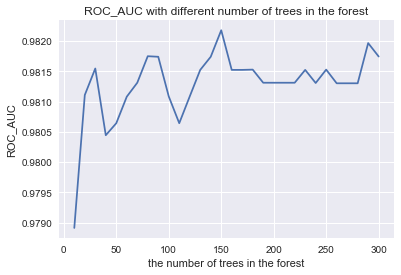

In [72]:
## use plot to see how data science job position number change by years
plt.plot(rf_roc_auc_all.index, rf_roc_auc_all.asobject)
plt.xlabel('the number of trees in the forest')
plt.ylabel('ROC_AUC')
plt.title('ROC_AUC with different number of trees in the forest')
plt.show()

###### From the plot above, we can learn that begin with 10 trees in the forest, while we increase the number of trees, the roc_auc score will increase. The roc_auc score is quite stable and high while the number of trees between 150 and 300. However, when the number of trees larger than 150, it will take longer time to compute. Hence, for this dataset, we choose the number of trees equals to 150 (n_estimators=150) as our final Random Forest model.

# Conclusion

###### For this dataset,we choose the Random Forests(n_estimators=150) as our final model.

In [73]:
final_rfclassifier= RandomForestClassifier(n_estimators=150, random_state=0)
final_rfclassifier.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Confusion matrix, without normalization
[[2201   58]
 [  23 2284]]


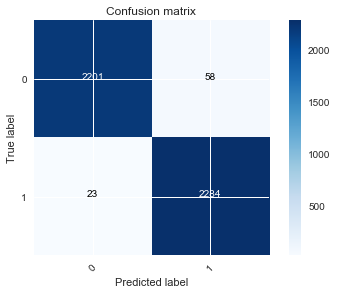

In [74]:
## plot the confusion_matrix
from sklearn.metrics import confusion_matrix
fin_cnf_matrix = confusion_matrix(y_test2, final_rfclassifier.predict(X_test2))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(fin_cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

###### True Positive=2284, Flase Positve=58, True Negative=2201, Flase Negative=23.

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, final_rfclassifier.predict(X_test2) ))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      2259
          1       0.98      0.99      0.98      2307

avg / total       0.98      0.98      0.98      4566



In [76]:
print("recall score:",recall_score(y_test2, final_rfclassifier.predict(X_test2), average='micro'))

recall score: 0.982260183968


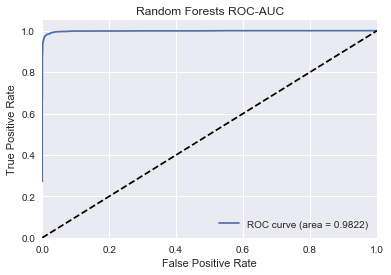

In [77]:
from sklearn.metrics import roc_auc_score
fin_rf_roc_auc=roc_auc_score(y_test2, final_rfclassifier.predict(X_test2))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, final_rfclassifier.predict_proba(X_test2)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % fin_rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forests ROC-AUC')
plt.legend(loc="lower right")
plt.show()